# Theoretical Assignments:
## 1. Explain the Architectures of Neural Networks :

Architectures of Neural Networks
A Neural Network Architecture refers to the structure and organization of different layers and neurons (nodes) in the network. It defines how the data flows, how neurons are connected, and how learning takes place. The architecture impacts the learning ability, speed, and accuracy of the model.

Key Components of Neural Network Architectures:
1. Input Layer:

- The first layer that receives the raw data (features) and passes it to the next layer.

2. Hidden Layers:

- Layers between input and output where computations are performed.

- The number of hidden layers and the number of neurons per layer determines the depth and capacity of the network.

3. Output Layer:

- Produces the final prediction or classification based on the computations.

Common Types of Neural Network Architectures:

A. Feedforward Neural Network (FNN)
- The simplest form of a neural network where information moves in one direction: from input to output.

- No loops or cycles.

- Used for classification and regression tasks.

Example: Basic multi-layer perceptron (MLP)

B. Convolutional Neural Network (CNN)
- Designed specifically for processing grid-like data such as images.

- Includes layers like Convolutional Layers, Pooling Layers, and Fully Connected Layers.

- Captures spatial hierarchies and patterns.

Applications: Image recognition, video analysis, object detection.

C. Recurrent Neural Network (RNN)
- Suitable for sequential data where current output depends on previous computations.

- Has loops to allow information to persist.

- A special case includes LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) which solve the vanishing gradient problem.

Applications: Language modeling, time series forecasting, speech recognition.

D. Autoencoder
- An unsupervised neural network used for learning efficient data representations.

- Consists of an Encoder and a Decoder with a bottleneck layer in between.

- Used for dimensionality reduction, anomaly detection, and denoising.

E. Generative Adversarial Network (GAN)
- Consists of two neural networks: Generator and Discriminator.

- The Generator creates fake data, and the Discriminator distinguishes between real and fake.

- Known for generating realistic images, art, and synthetic data.

F. Transformer Architecture
- Based on the Attention Mechanism instead of recurrence.

- Can process entire sequences in parallel.

- Foundation for modern NLP models like BERT and GPT.

Applications: Language translation, text summarization, chatbots.

Factors Affecting Neural Network Architecture:
- Number of layers (Depth)

- Number of neurons per layer (Width)

- Activation functions (ReLU, Sigmoid, Tanh)

- Regularization techniques (Dropout, BatchNorm)

- Optimization algorithms (SGD, Adam)

# Practical Tasks
## Task 1: Predicting Customer Churn

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d thedevastator/predicting-credit-card-customer-attrition-with-m

Dataset URL: https://www.kaggle.com/datasets/thedevastator/predicting-credit-card-customer-attrition-with-m
License(s): CC0-1.0
  0% 0.00/379k [00:00<?, ?B/s]
100% 379k/379k [00:00<00:00, 365MB/s]


In [5]:
!unzip predicting-credit-card-customer-attrition-with-m.zip

Archive:  predicting-credit-card-customer-attrition-with-m.zip
  inflating: BankChurners.csv        


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,SimpleRNN,Embedding,LSTM,GRU
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
df = pd.read_csv('BankChurners.csv')


In [9]:
df.shape

(10127, 23)

In [10]:
df.sample(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
10032,712128258,Existing Customer,49,F,4,High School,Single,Less than $40K,Silver,40,...,13704.0,2127,11577.0,0.805,15872,116,0.681,0.155,0.000822,0.999180
4593,719328858,Attrited Customer,56,M,4,High School,Married,$60K - $80K,Blue,43,...,4535.0,0,4535.0,0.831,2342,40,0.600,0.000,0.999010,0.000988
3183,708618933,Existing Customer,34,M,2,Uneducated,Single,$120K +,Blue,13,...,4369.0,2049,2320.0,0.865,3259,80,0.600,0.469,0.000185,0.999820
5687,720725883,Existing Customer,34,F,2,College,Single,Less than $40K,Blue,20,...,2715.0,1503,1212.0,0.704,4177,68,0.659,0.554,0.000186,0.999810
2554,720693033,Attrited Customer,33,M,1,Unknown,Married,$60K - $80K,Blue,36,...,8925.0,168,8757.0,0.447,741,10,0.429,0.019,0.998130,0.001874
7715,737962608,Existing Customer,48,F,4,College,Divorced,Less than $40K,Blue,41,...,3745.0,2517,1228.0,0.672,4550,78,0.857,0.672,0.000183,0.999820
7355,711994458,Existing Customer,47,F,4,High School,Married,Unknown,Blue,39,...,1537.0,0,1537.0,0.712,4234,75,0.786,0.000,0.000082,0.999920
4270,715514133,Attrited Customer,44,F,4,Graduate,Married,Less than $40K,Blue,31,...,2184.0,0,2184.0,0.671,1973,42,0.556,0.000,0.998160,0.001844
870,717028158,Existing Customer,53,M,3,Graduate,Married,$120K +,Blue,44,...,12163.0,2082,10081.0,1.554,2649,56,0.697,0.171,0.000199,0.999800
8231,789992733,Existing Customer,50,F,1,Unknown,Unknown,Less than $40K,Blue,42,...,2210.0,1539,671.0,0.843,4937,75,0.974,0.696,0.000057,0.999940


## Column Description

| **Column name**                                                                                                                                           | **Description**                                                                                       |
| --------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------- |
| **CLIENTNUM**                                                                                                                                             | Unique identifier for each customer. (Integer)                                                        |
| **Attrition\_Flag**                                                                                                                                       | Flag indicating whether or not the customer has churned out. (Boolean) **Target Variable**                                |
| **Customer\_Age**                                                                                                                                         | Age of customer. (Integer)                                                                            |
| **Gender**                                                                                                                                                | Gender of customer. (String)                                                                          |
| **Dependent\_count**                                                                                                                                      | Number of dependents that customer has. (Integer)                                                     |
| **Education\_Level**                                                                                                                                      | Education level of customer. (String)                                                                 |
| **Marital\_Status**                                                                                                                                       | Marital status of customer. (String)                                                                  |
| **Income\_Category**                                                                                                                                      | Income category of customer. (String)                                                                 |
| **Card\_Category**                                                                                                                                        | Type of card held by customer. (String)                                                               |
| **Months\_on\_book**                                                                                                                                      | How long customer has been on the books. (Integer)                                                    |
| **Total\_Relationship\_Count**                                                                                                                            | Total number of relationships customer has with the credit card provider. (Integer)                   |
| **Months\_Inactive\_12\_mon**                                                                                                                             | Number of months customer has been inactive in the last twelve months. (Integer)                      |
| **Contacts\_Count\_12\_mon**                                                                                                                              | Number of contacts customer has had in the last twelve months. (Integer)                              |
| **Credit\_Limit**                                                                                                                                         | Credit limit of customer. (Integer)                                                                   |
| **Total\_Revolving\_Bal**                                                                                                                                 | Total revolving balance of customer. (Integer)                                                        |
| **Avg\_Open\_To\_Buy**                                                                                                                                    | Average open to buy ratio of customer. (Integer)                                                      |
| **Total\_Amt\_Chng\_Q4\_Q1**                                                                                                                              | Total amount changed from quarter 4 to quarter 1. (Integer)                                           |
| **Total\_Trans\_Amt**                                                                                                                                     | Total transaction amount. (Integer)                                                                   |
| **Total\_Trans\_Ct**                                                                                                                                      | Total transaction count. (Integer)                                                                    |
| **Total\_Ct\_Chng\_Q4\_Q1**                                                                                                                               | Total count changed from quarter 4 to quarter 1. (Integer)                                            |
| **Avg\_Utilization\_Ratio**                                                                                                                               | Average utilization ratio of customer. (Integer)                                                      |
| **Naive\_Bayes\_Classifier\_Attrition\_Flag\_Card\_Category\_Contacts\_Count\_12\_mon\_Dependent\_count\_Education\_Level\_Months\_Inactive\_12\_mon\_1** | Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such |


In [16]:
df.drop(['CLIENTNUM'],axis = 1,inplace=True)

In [17]:
df.isnull().sum()

,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0
Total_Relationship_Count,0


In [18]:
df.duplicated().sum()

np.int64(0)

In [19]:
cat_col = ['Gender','Education_Level','Marital_Status','Income_Category','Card_Category']

In [20]:
for i in cat_col:
  print(df[i].value_counts())
  print("")
  print("")
  print("")

Gender
F    5358
M    4769
Name: count, dtype: int64



Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64



Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64



Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64



Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64





In [21]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
Existing Customer,8500
Attrited Customer,1627


In [22]:
df['Attrition_Flag'] = df['Attrition_Flag'].apply(lambda x: 1 if x == 'Attrited Customer' else 0)

In [23]:
df['Attrition_Flag'].value_counts()

,count
Attrition_Flag,
0,8500
1,1627


In [25]:
le = LabelEncoder()
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [26]:
for i in cat_col:
  print(df[i].value_counts())
  print("")
  print("")
  print("")

Gender
0    5358
1    4769
Name: count, dtype: int64



Education_Level
2    3128
3    2013
6    1519
5    1487
0    1013
4     516
1     451
Name: count, dtype: int64



Marital_Status
1    4687
2    3943
3     749
0     748
Name: count, dtype: int64



Income_Category
4    3561
1    1790
3    1535
2    1402
5    1112
0     727
Name: count, dtype: int64



Card_Category
0    9436
3     555
1     116
2      20
Name: count, dtype: int64





In [52]:
x = df.drop('Attrition_Flag', axis=1)
y = df['Attrition_Flag']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [53]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [54]:
model = Sequential([
    Dense(32,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [55]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                 │ (None, 32)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,881 (11.25 KB)

 Trainable params: 2,881 (11.25 KB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [57]:
history = model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2)

Epoch 1/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8797 - loss: 0.2943 - val_accuracy: 1.0000 - val_loss: 0.0066
Epoch 2/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 0.0015
Epoch 3/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 1.0000 - val_loss: 6.5711e-04
Epoch 4/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.8769e-04 - val_accuracy: 1.0000 - val_loss: 3.7030e-04
Epoch 5/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 2.8303e-04 - val_accuracy: 1.0000 - val_loss: 2.3932e-04
Epoch 6/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.7681e-04 - val_accuracy: 1.0000 - val_loss: 1.6637e-04
Epoch 7/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 1.0000 - loss: 1.2351e-04 - val_accuracy: 1.0000 - val_loss: 1.2337e-04
Epoch 8/10
203/203 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 1.00

In [58]:
loss, accuracy = model.evaluate(x_test, y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 4.4777e-05


In [59]:
accuracy

1.0

In [60]:
loss

4.438854375621304e-05

## Task 2: Digit Recognizer

In [64]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [65]:
! pip install idx2numpy


  Preparing metadata (setup.py) ... done
  Created wheel for idx2numpy: filename=idx2numpy-1.2.3-py3-none-any.whl size=7903 sha256=5cc02d0e1518aa6789ba8a91e2cb4f39953bc7a186c6d343bf75ebe4dabbadae
  Stored in directory: /root/.cache/pip/wheels/87/e5/e7/70fc742b3645ddf9d392f766feccbcc95cb3a3c806f8588af0
Successfully built idx2numpy


In [74]:
import idx2numpy

x_train = idx2numpy.convert_from_file('train-images.idx3-ubyte')
y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')

x_test = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')


In [75]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [76]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [77]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [79]:
model = Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation='relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')
])

In [80]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
es = EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [87]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [88]:
model.fit(x_train,y_train,epochs=10,batch_size=32,validation_split=0.2,callbacks=[es])

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 60s 38ms/step - accuracy: 0.9740 - loss: 0.0880 - val_accuracy: 0.9845 - val_loss: 0.0521
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 89s 59ms/step - accuracy: 0.9818 - loss: 0.0640 - val_accuracy: 0.9887 - val_loss: 0.0410
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 110s 38ms/step - accuracy: 0.9841 - loss: 0.0504 - val_accuracy: 0.9892 - val_loss: 0.0425
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9883 - loss: 0.0394 - val_accuracy: 0.9901 - val_loss: 0.0373
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.9900 - loss: 0.0326 - val_accuracy: 0.9893 - val_loss: 0.0408
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 37ms/step - accuracy: 0.9919 - loss: 0.0289 - val_accuracy: 0.9908 - val_loss: 0.0365
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 39ms/step - accuracy: 0.9927 - loss: 0.0239 - val_accuracy: 0.9898 - val_loss: 0.0443
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 37ms/step - accuracy: 0.9928 

In [89]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9885 - loss: 0.0340


## Task 3: Sentiment Analysis

In [5]:
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
  0% 0.00/25.7M [00:00<?, ?B/s]
100% 25.7M/25.7M [00:00<00:00, 1.22GB/s]


In [6]:
!unzip imdb-dataset-of-50k-movie-reviews.zip

Archive:  imdb-dataset-of-50k-movie-reviews.zip
  inflating: IMDB Dataset.csv        


In [7]:
df = pd.read_csv('IMDB Dataset.csv')

In [8]:
df.shape

(50000, 2)

In [9]:
df.sample(5)

,review,sentiment
20122,The back of the DVD box says Ellen Page co-sta...,negative
19355,Viewers gushing over everything including the ...,negative
16385,"This movie is about pathetic, spoiled, ego-dri...",negative
37271,Ladies and Gentlemen.. Be sad (or be glad !).....,negative
18081,Syriana swept the critics upon release and eve...,negative


In [10]:
df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)

In [11]:
df['sentiment'].value_counts()

,count
sentiment,
1,25000
0,25000


In [12]:
df.isnull().sum()

,0
review,0
sentiment,0


In [13]:
df.duplicated().sum()

np.int64(418)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
x = df['review'].astype(str)
y = df['sentiment']

In [16]:
print(x.sample(5))
print(y.sample(5))

49226    Like another reviewer, I really wanted to like...
48050    I saw the 7.5 IMDb rating on this movie and on...
44544    After finally watching Walt Disney's Song of t...
26161    I saw this on a boring Sunday morning just thi...
13887    This show was a landmark in American comedy as...
Name: review, dtype: object
30478    0
236      1
20055    1
21463    0
19067    0
Name: sentiment, dtype: int64


In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [18]:
vocab_size = 25000
max_len = 200

tokenizer = Tokenizer(num_words=vocab_size, oov_token="OOV")
tokenizer.fit_on_texts(x_train)

x_train_seq = tokenizer.texts_to_sequences(x_train)
x_test_seq = tokenizer.texts_to_sequences(x_test)

x_train_pad = pad_sequences(x_train_seq, maxlen=max_len, padding='post', truncating='post')
x_test_pad = pad_sequences(x_test_seq, maxlen=max_len, padding='post', truncating='post')


In [19]:
x_train_pad.shape

(39665, 200)

### Simple RNN Model

In [20]:
model = Sequential([
    Embedding(vocab_size,128,input_length=max_len),
    SimpleRNN(256),
    Dropout(0.5),
    Dense(1,activation='sigmoid')
])
model.build(input_shape=(None,max_len))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 200, 128)       │     3,200,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 256)            │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,298,817 (12.58 MB)

 Trainable params: 3,298,817 (12.58 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

In [25]:
model.fit(x_train_pad,y_train,epochs=10,batch_size=128,callbacks=[es])

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.4962 - loss: 0.7649
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.4974 - loss: 0.7178
Epoch 3/10
  1/310 ━━━━━━━━━━━━━━━━━━━━ 35s 116ms/step - accuracy: 0.5703 - loss: 0.6931

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5061 - loss: 0.6987
Epoch 4/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.5144 - loss: 0.6907

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.5297 - loss: 0.6897
Epoch 5/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.5595 - loss: 0.6683
Epoch 6/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.5878 - loss: 0.6307
Epoch 7/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6175 - loss: 0.5973

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6255 - loss: 0.5892
Epoch 8/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6467 - loss: 0.5544

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6571 - loss: 0.5473
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.6612 - loss: 0.5357
Epoch 10/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - accuracy: 0.6792 - loss: 0.5184

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.6827 - loss: 0.5019


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


In [26]:
loss,accuracy = model.evaluate(x_test_pad,y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4846 - loss: 0.9197


### LSTM : Long Short-Term Memory

In [28]:
 model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        LSTM(64),
        Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [29]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.fit(x_train_pad,y_train,epochs=10,batch_size=128,callbacks=[es])

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.5302 - loss: 0.6898
Epoch 2/10
 13/310 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.7101 - loss: 0.5941

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6303 - loss: 0.6557
Epoch 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6269 - loss: 0.6390
Epoch 4/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step - accuracy: 0.6171 - loss: 0.6402
Epoch 5/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.7705 - loss: 0.5547

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.7840 - loss: 0.4953
Epoch 6/10
  4/310 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.8558 - loss: 0.3722  

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8509 - loss: 0.3730
Epoch 7/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9080 - loss: 0.2863
Epoch 8/10
 13/310 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9352 - loss: 0.2381

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9381 - loss: 0.2031
Epoch 9/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9577 - loss: 0.1529
Epoch 10/10
 13/310 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.9688 - loss: 0.1235

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9697 - loss: 0.1158


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


In [32]:
loss,accuracy = model.evaluate(x_test_pad,y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8743 - loss: 0.3665


### GRU : Gated Recurrent Unit

In [33]:
 model = Sequential([
        Embedding(vocab_size, 128, input_length=max_len),
        GRU(64),
        Dense(1, activation='sigmoid')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [34]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [35]:
model.fit(x_train_pad,y_train,epochs=10,batch_size=128,callbacks=[es])

Epoch 1/10
310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.5134 - loss: 0.6924
Epoch 2/10
  9/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7241 - loss: 0.5888

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6662 - loss: 0.6161
Epoch 3/10
 11/310 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.8732 - loss: 0.3146

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.8899 - loss: 0.2795
Epoch 4/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9457 - loss: 0.1608
Epoch 5/10
  9/310 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.9843 - loss: 0.0736

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9716 - loss: 0.0930
Epoch 6/10
 12/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9919 - loss: 0.0359

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9843 - loss: 0.0545
Epoch 7/10
 10/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9876 - loss: 0.0472

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9901 - loss: 0.0368
Epoch 8/10
  7/310 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9982 - loss: 0.0120

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9957 - loss: 0.0182
Epoch 9/10
 13/310 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.9969 - loss: 0.0122

/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.9975 - loss: 0.0118
Epoch 10/10


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9973 - loss: 0.0104


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


In [36]:
loss,accuracy = model.evaluate(x_test_pad,y_test)

310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8635 - loss: 0.6266


In [37]:
model.save("best_sentiment_model.h5")

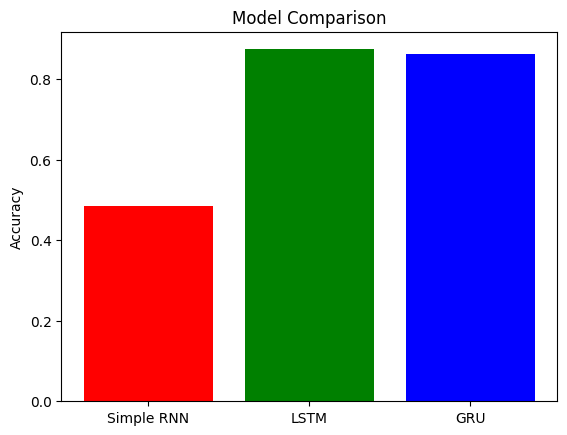

In [43]:
import matplotlib.pyplot as plt

models = ['Simple RNN', 'LSTM', 'GRU']
accuracies = [0.4846, 0.8743, 0.8635]

plt.bar(models, accuracies, color=['red', 'green', 'blue'])
plt.title('Model Comparison')
plt.ylabel('Accuracy')
plt.show()


In [41]:
sample_text = ["This movie was really good and inspiring!"]
seq = tokenizer.texts_to_sequences(sample_text)
padded = pad_sequences(seq, maxlen=150, padding='post', truncating='post')

prediction = model.predict(padded)
print(prediction)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.99498487]]


## **The best model suited for this applicationv is LSTM**